# Exposures for Displacement Modelling

Currently, 3 types of exposures are available:
1. [Global Human Settlement Layer (GHSL)](#Global-Human-Settlement-Layer-(GHSL))
2. [Aggregate building values (residential / no-residential) from the Building Exposure Model](#BEM-res-/-BEM-nres)
3. [Sub-components leading to the BEM](#BEM-subcomponents)

The following sections illustrate all of the three options for Somalia.

**Note:** If you want to run these yourself, adjust the file paths in `exposure.py` manually. For more information, see the code documentation in the source code.

In [1]:
from climada.entity.exposures import Exposures
import numpy as np
import os

os.chdir('/Users/evelynm/Documents/UNU_IDMC/global-displacement-risk') # your-path-to/global-displacement-risk
import exposure

In [2]:
cntry_name = 'Somalia'

## Global Human Settlement Layer (GHSL)

In [3]:
exp_ghsl = exposure.exp_from_ghsl(cntry_name)

2024-03-01 17:29:50,090 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/GHS_POP_E2020_GLOBE_R2023A_54009_1000_V1_0/GHS_POP_E2020_GLOBE_R2023A_54009_1000_V1_0.tif


<GeoAxes: >

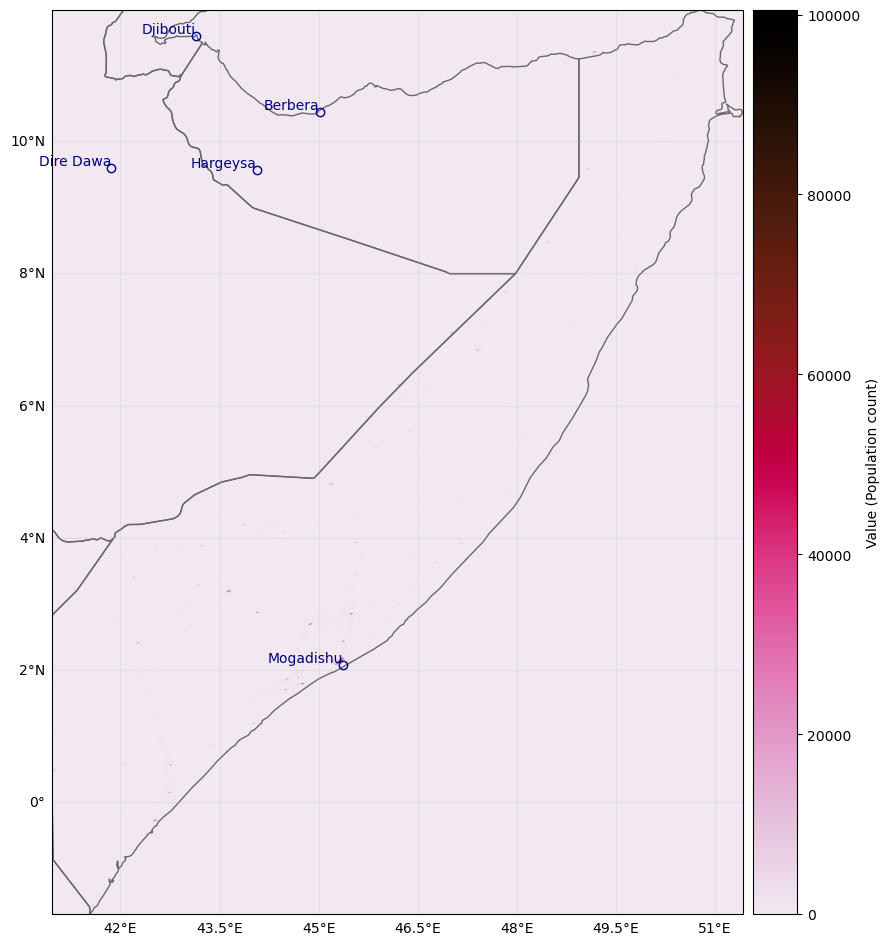

In [4]:
exp_ghsl.plot_scatter(adapt_fontsize=False)

## BEM-res / BEM-nres

In [5]:
exp_bem_res = exposure.exp_from_bem_res(cntry_name)
exp_bem_nres = exposure.exp_from_bem_nres(cntry_name)

2024-03-01 17:31:29,042 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/bem_global_raster/bem_1x1_valfis_res.tif
2024-03-01 17:31:31,555 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/bem_global_raster/bem_1x1_valfis_nres.tif


<GeoAxes: >

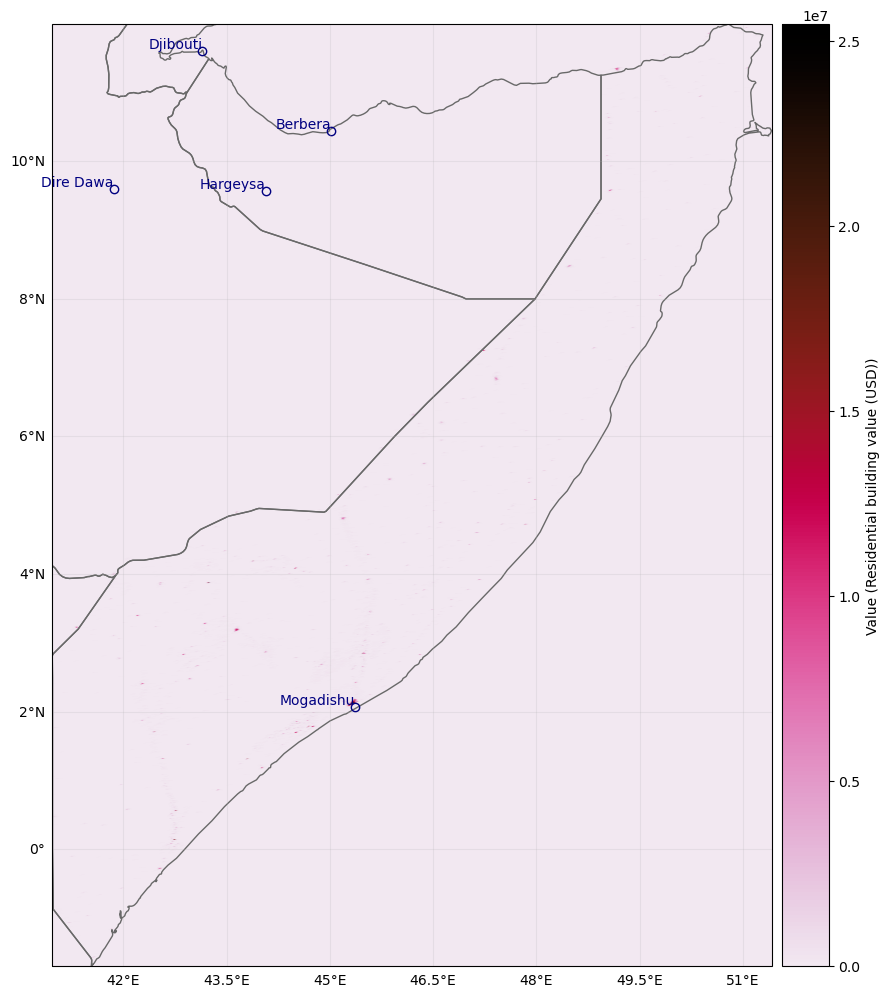

In [6]:
exp_bem_res.plot_scatter(adapt_fontsize=False)

<GeoAxes: >

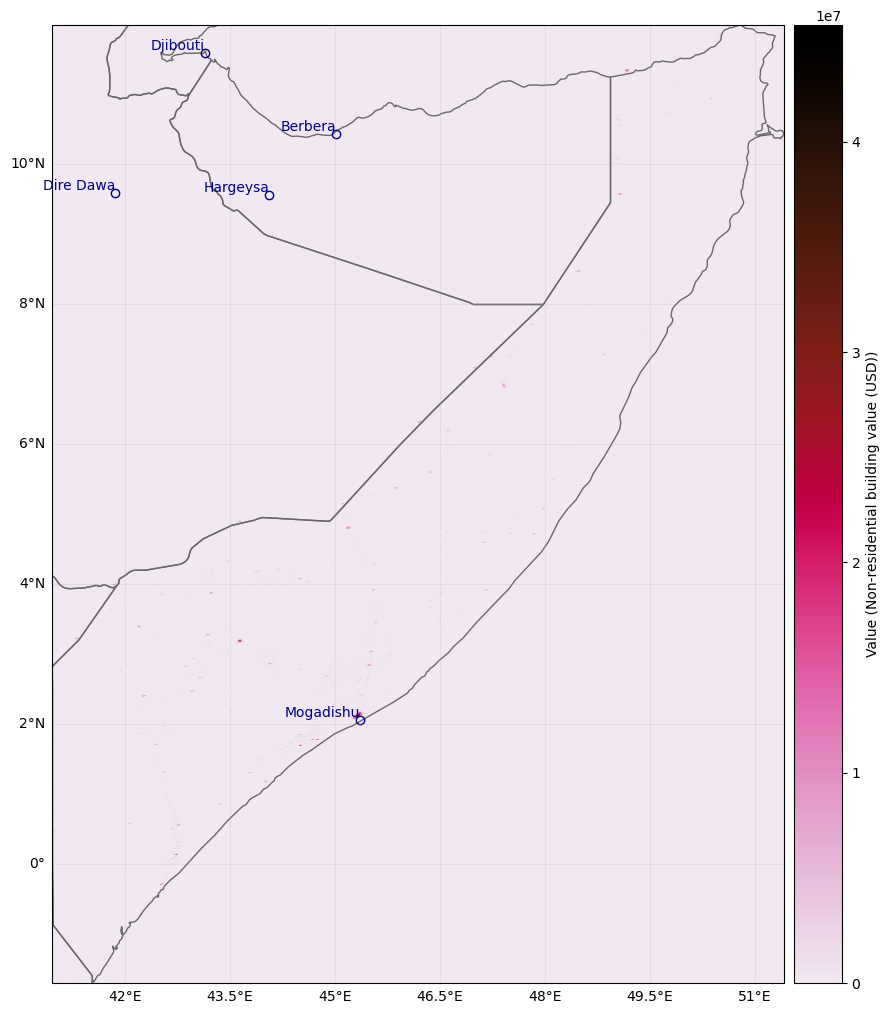

In [7]:
exp_bem_nres.plot_scatter(adapt_fontsize=False)

## BEM subcomponents

### non-aggregated

These are derived from country-wise `.csv` files.
The following functions load them into `GeoDataFrames`, adding coordinates from a separate file.

To convert them into formats usable as `Exposures()`, a few processing options are available (work in progress).

In [3]:
# Load the full dataframe, without further re-aggregation / processing other than adding centroids
gdf_bem_subcomps = exposure.gdf_from_bem_subcomps(cntry_name, opt='full')
gdf_bem_subcomps.head()

2024-04-19 19:14:37,543 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/grid_1x1_gid.tif


,id_1x,iso3,cpx,sector,se_seismo,valhum,valfis,bd_1_floor,bd_2_floor,bd_3_floor,geometry
0,174025676,SOM,3,beds_priv,W2,0.000342,5.179267e-07,100.0,0.0,0.0,POINT (50.54583 11.86250)
1,174025676,SOM,3,beds_priv,W1,0.000146,2.214579e-07,100.0,0.0,0.0,POINT (50.54583 11.86250)
2,174025676,SOM,3,beds_priv,UCB,0.000005,7.143810e-09,100.0,0.0,0.0,POINT (50.54583 11.86250)
3,174025676,SOM,3,beds_priv,RS2,0.000038,5.715046e-08,100.0,0.0,0.0,POINT (50.54583 11.86250)
4,174025676,SOM,3,beds_priv,INF,0.000014,2.143141e-08,100.0,0.0,0.0,POINT (50.54583 11.86250)


Info on the meaning of the columns can be found in the UNEP-GRID technical documentation and further references. The centroids (id_1x / geometry) is multiply defined, each separate sector-se_seismo combo has its unique row.

In [4]:
exp_bem_sub = Exposures(gdf_bem_subcomps.copy())
exp_bem_sub.gdf.rename({'valhum': 'value'}, axis=1, inplace=True)
exp_bem_sub.value_unit = 'Pop. count'
exp_bem_sub.gdf['longitude'] = exp_bem_sub.gdf.geometry.x
exp_bem_sub.gdf['latitude'] = exp_bem_sub.gdf.geometry.y

## BEM-subcomponents

### - reaggregated

Another option is to group the dataframe into single rows per centroid, performing some simple aggregations over the remaining columns (see code documentation - summing population, summing economic value, averaging building levels, getting the dominant sector and seismic building code per cell).

In [5]:
gdf_bem_subcomps_pergrid = exposure.gdf_from_bem_subcomps(cntry_name, opt='per_grid')
gdf_bem_subcomps_pergrid.head()

2024-03-08 17:33:24,875 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/grid_1x1_gid.tif


,valfis,valhum,cpx,bd_1_floor,bd_2_floor,bd_3_floor,geometry,se_seismo,sector
id_1x,,,,,,,,,
174014207,0.152284,125.009128,3.0,0.000,0.000,0.000,POINT (50.79583 11.97917),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174015812,0.156431,128.413502,3.0,67.881,25.497,6.622,POINT (50.75417 11.96250),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174016614,0.004673,3.836273,3.0,0.000,0.000,0.000,POINT (50.75417 11.95417),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174017411,0.035019,28.746637,3.0,100.000,0.000,0.000,POINT (50.72083 11.94583),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174017412,0.035019,28.746637,3.0,0.000,0.000,0.000,POINT (50.72917 11.94583),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."


Various types of `Exposures()` can now be easily created form this. However, for Somalia lots of centroids are "missing" - unclear why atm.

<GeoAxes: >

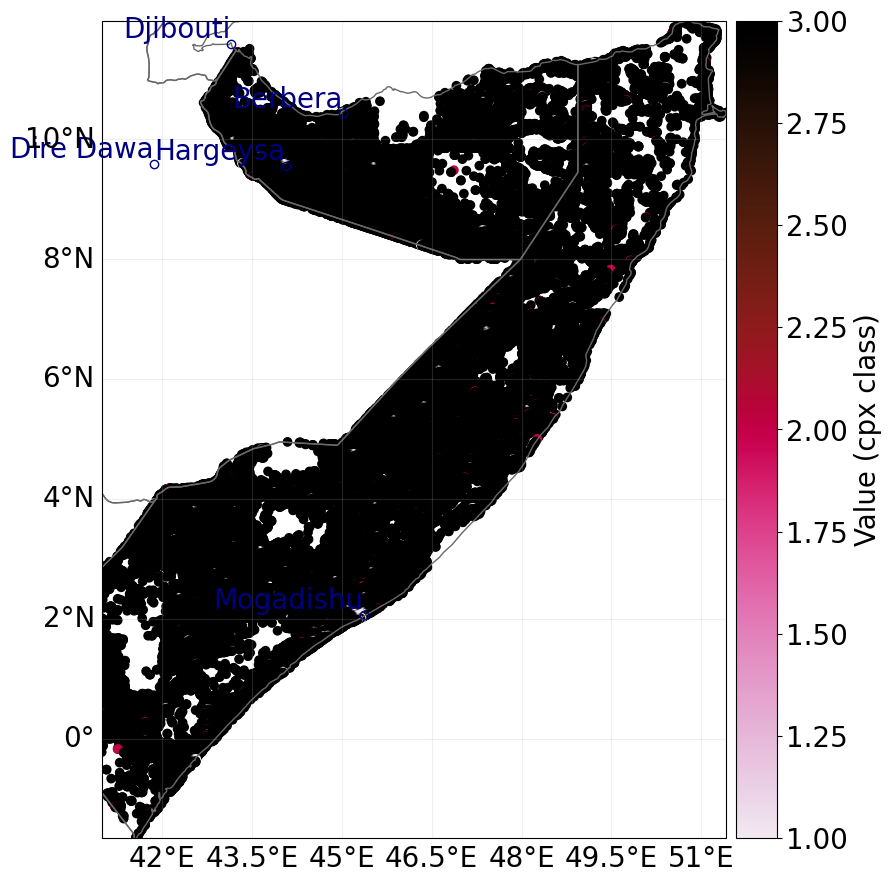

In [6]:
# Exposure where value is landuse type (cpx; 3=rural, 1=urban)
exp_cpx = Exposures(gdf_bem_subcomps_pergrid.copy())
exp_cpx.gdf.rename({'cpx': 'value'}, axis=1, inplace=True)
exp_cpx.value_unit = 'cpx class'
exp_cpx.gdf['longitude'] = exp_cpx.gdf.geometry.x
exp_cpx.gdf['latitude'] = exp_cpx.gdf.geometry.y
exp_cpx.gdf = exp_cpx.gdf[~np.isnan(
    exp_cpx.gdf.latitude)]  # drop nan centroids
exp_cpx.plot_scatter()


<GeoAxes: >

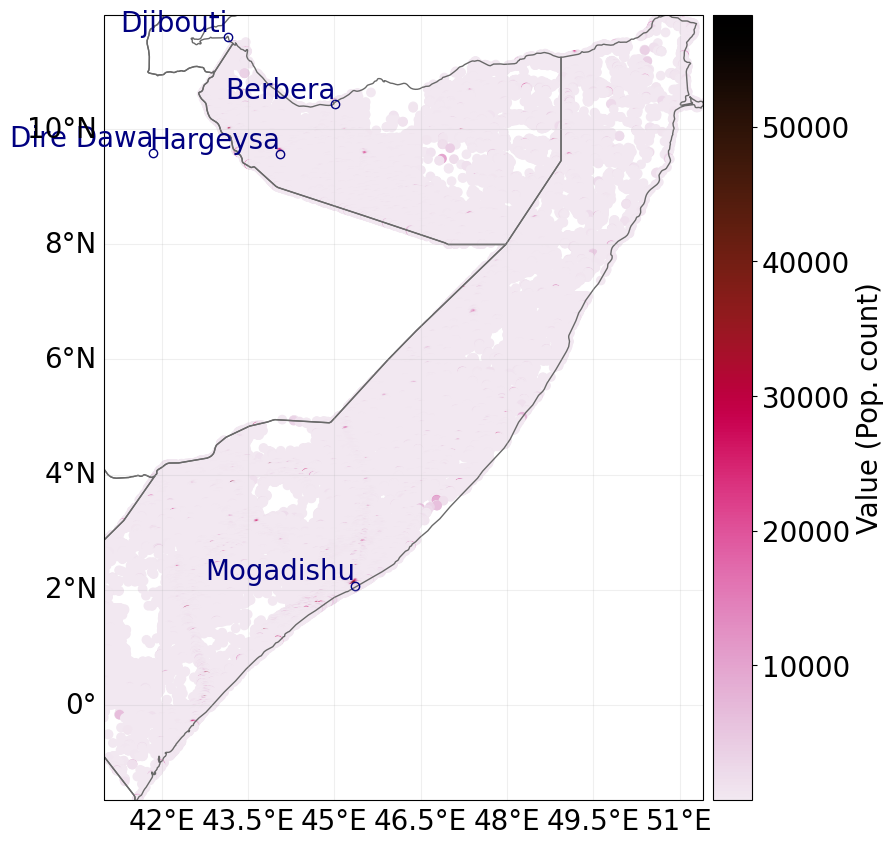

In [7]:
# Exposure where value is population count
exp_hum = Exposures(gdf_bem_subcomps_pergrid.copy())
exp_hum.gdf.rename({'valhum': 'value'}, axis=1, inplace=True)
exp_hum.value_unit = 'Pop. count'
exp_hum.gdf['longitude'] = exp_hum.gdf.geometry.x
exp_hum.gdf['latitude'] = exp_hum.gdf.geometry.y
exp_hum.gdf = exp_hum.gdf[~np.isnan(
    exp_hum.gdf.latitude)]  # drop nan centroids
exp_hum.plot_scatter()

<GeoAxes: >

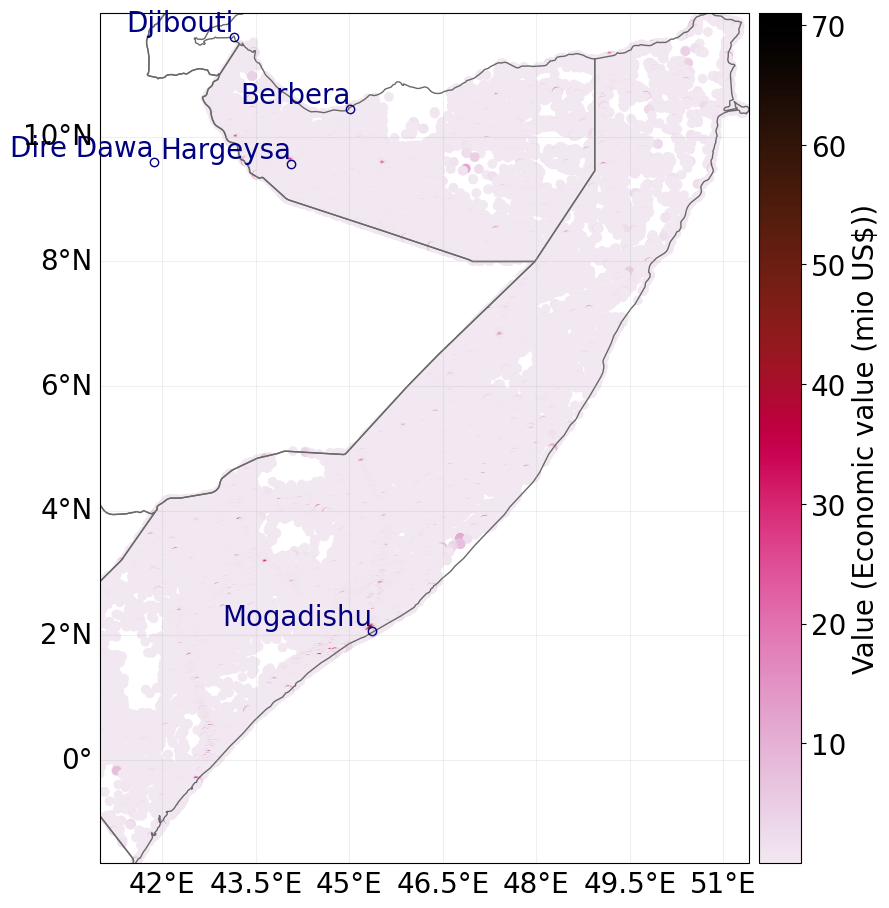

In [8]:
# Exposure where value is total economic value
exp_val = Exposures(gdf_bem_subcomps_pergrid.copy())
exp_val.gdf.rename({'valfis': 'value'}, axis=1, inplace=True)
exp_val.value_unit = 'Economic value (mio US$)'
exp_val.gdf['longitude'] = exp_val.gdf.geometry.x
exp_val.gdf['latitude'] = exp_val.gdf.geometry.y
exp_val.gdf = exp_val.gdf[~np.isnan(
    exp_val.gdf.latitude)]  # drop nan centroids
exp_val.plot_scatter()


**Outlook:**
Exposures with population per building code, sectors per building code (either one Exposure per building code, or multiply defined centroids, if possible).

## Assigning admin-1 info

To be able to disaggregate results based on admin-1 regions, centroids can be grouped according to admin 1 classifications of either GADM or UNMAP. 

**Note** As a large csv-mapping file needs to be queried (to match the gid_1x identifier with the respective admin 1 class, this takes a while.

In [5]:
exp_bem_sub.gdf = exposure.assign_admin1_attr(exp_bem_sub.gdf.copy(), exposure.path_admin1_attrs, source='gadm')

In [6]:
exp_bem_sub.gdf.head()

,id_1x,iso3,cpx,sector,se_seismo,value,valfis,bd_1_floor,bd_2_floor,bd_3_floor,geometry,longitude,latitude,admin1
0,174025676,SOM,3,beds_priv,W2,0.000342,5.179267e-07,100.0,0.0,0.0,POINT (50.54583 11.86250),50.545833,11.8625,2839.0
1,174025676,SOM,3,beds_priv,W1,0.000146,2.214579e-07,100.0,0.0,0.0,POINT (50.54583 11.86250),50.545833,11.8625,2839.0
2,174025676,SOM,3,beds_priv,UCB,0.000005,7.143810e-09,100.0,0.0,0.0,POINT (50.54583 11.86250),50.545833,11.8625,2839.0
3,174025676,SOM,3,beds_priv,RS2,0.000038,5.715046e-08,100.0,0.0,0.0,POINT (50.54583 11.86250),50.545833,11.8625,2839.0
4,174025676,SOM,3,beds_priv,INF,0.000014,2.143141e-08,100.0,0.0,0.0,POINT (50.54583 11.86250),50.545833,11.8625,2839.0


## How to continue? 

See how to assign vulnerability functions to these exposures (tutorial vulnerability)